In [1]:
import utils
import matplotlib.pyplot as plt
from task2a import pre_process_images, one_hot_encode, SoftmaxModel
from task2 import SoftmaxTrainer


# hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
num_epochs = 50
learning_rate = .1
batch_size = 32
momentum_gamma = .9  # Task 3 hyperparameter
shuffle_data = True
use_improved_sigmoid = True
use_improved_weight_init = True
use_momentum = False
use_relu = False

# Load dataset
X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
X_train = pre_process_images(X_train)
X_val = pre_process_images(X_val)
Y_train = one_hot_encode(Y_train, 10)
Y_val = one_hot_encode(Y_val, 10)

Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)
mean = 33.55274553571429, std = 78.87550070784701
mean = 33.791224489795916, std = 79.17246322228644


In [7]:
# Start with model from task 2
neurons_per_layer = [64, 10]

model = SoftmaxModel(
    neurons_per_layer,
    use_improved_sigmoid,
    use_improved_weight_init,
    use_relu)
trainer = SoftmaxTrainer(
    momentum_gamma, use_momentum,
    model, learning_rate, batch_size, shuffle_data,
    X_train, Y_train, X_val, Y_val,
)
train_history, val_history = trainer.train(num_epochs)

Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
Early stopping at epoch 9875


In [10]:
neurons_per_layer = [72, 72, 10]

model2 = SoftmaxModel(
    neurons_per_layer,
    use_improved_sigmoid,
    use_improved_weight_init,
    use_relu)
trainer2 = SoftmaxTrainer(
    momentum_gamma, use_momentum,
    model2, learning_rate, batch_size, shuffle_data,
    X_train, Y_train, X_val, Y_val,
)
train_history2, val_history2 = trainer2.train(num_epochs)

Initializing weight to shape: (785, 72)
Initializing weight to shape: (72, 72)
Initializing weight to shape: (72, 10)
Early stopping at epoch 10875


In [5]:
def compare_plot(train_history, val_history, train_history_improved, val_history_improved, description: str):
    plt.subplot(1, 2, 1)
    utils.plot_loss(train_history["loss"],
                    "Task 2 Model", npoints_to_average=10)
    utils.plot_loss(
        train_history_improved["loss"], description, npoints_to_average=10)
    plt.ylim([0, .4])
    plt.subplot(1, 2, 2)
    plt.ylim([0.85, 1])
    utils.plot_loss(val_history["accuracy"], "Task 2 Model")
    utils.plot_loss(
        val_history_improved["accuracy"], description)
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()

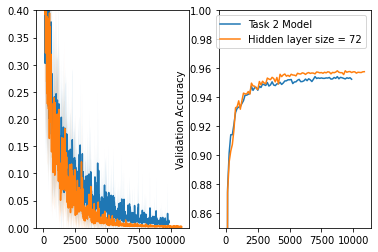

In [11]:
compare_plot(train_history, val_history, train_history2, val_history2, "Hidden layer size = 72")